<a href="https://colab.research.google.com/github/mnarware/OLA_DRIVER_CASE_STUDY/blob/main/Business_Case_OLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OLA Data Case Study

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Loading data into Pandas Dataframe

In [ ]:
url="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv"
data=pd.read_csv(url)
df=pd.DataFrame(data)

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


- Shape of the data

In [ ]:
df.shape

(19104, 14)

- 19104 rows and 14 columns

In [ ]:
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [ ]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


- There are statistical information we can see in above table like Standard Deviation,mean of the column, max, etc..

----
- Data Types of the columns

- Convert date-like features to their respective data type

In [ ]:
df['City']=df['City'].astype('category')
df['Dateofjoining']=df['Dateofjoining'].astype('datetime64[ns]')
df['LastWorkingDate']=df['LastWorkingDate'].astype('datetime64[ns]')
df['MMM-YY']=df['MMM-YY'].astype('datetime64[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            19104 non-null  int64         
 1   MMM-YY                19104 non-null  datetime64[ns]
 2   Driver_ID             19104 non-null  int64         
 3   Age                   19043 non-null  float64       
 4   Gender                19052 non-null  float64       
 5   City                  19104 non-null  category      
 6   Education_Level       19104 non-null  int64         
 7   Income                19104 non-null  int64         
 8   Dateofjoining         19104 non-null  datetime64[ns]
 9   LastWorkingDate       1616 non-null   datetime64[ns]
 10  Joining Designation   19104 non-null  int64         
 11  Grade                 19104 non-null  int64         
 12  Total Business Value  19104 non-null  int64         
 13  Quarterly Rating

**Encoding the Target Variable into 0 and 1**

- Converting Target variable (LastWorkingDate) into 0 and 1, 0 for nott leaving and 1 for leaving.

In [ ]:
#Creating another variable whether driver leave of not df['Is_Leaving']->  1: Leaving current compnay and 0: Not Leaving
df['Is_Leaving']=df['LastWorkingDate'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [ ]:
#Convert NaN values to 0
df['LastWorkingDate']=df['LastWorkingDate'].apply(lambda x: 0 if pd.isnull(x) else x)


In [ ]:
#df['LastWorkingDate'].value_counts()

- Currently 1615 driver are going to ressign

In [ ]:
print("Total Number of Drivers : ",df['Driver_ID'].nunique())

Total Number of Drivers :  2381


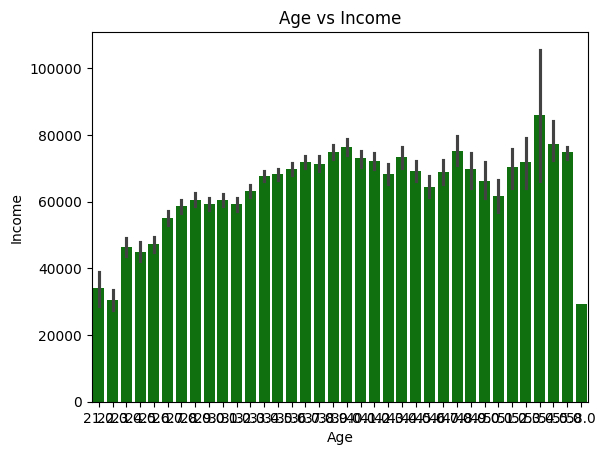

In [ ]:
sns.barplot(x=df['Age'],y=df['Income'], color='green')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.show()

- In the above plot it is clear that highest income category comes between 29 to 32 age category.

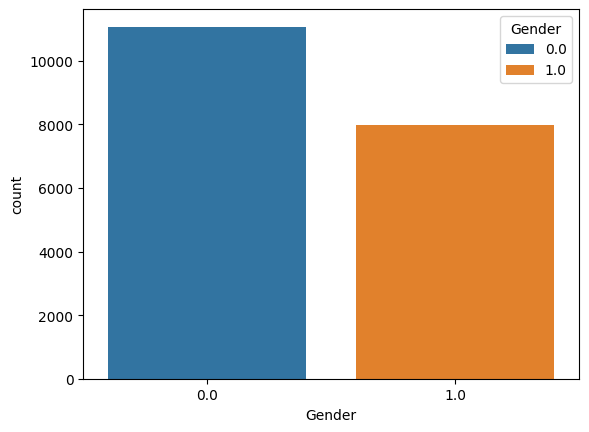

In [ ]:

sns.countplot(data=df,x='Gender',hue=df['Gender'])
plt.show()

- In above plot 1 is Female and 0 is Male,
- In OLA drive Male member is higher than Female.


In [ ]:
df.head(2)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Is_Leaving
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,0,1,1,2381060,2,0
1,1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,0,1,1,-665480,2,0


In [ ]:
df['Reporting_Date_duration']=(df['MMM-YY']-df['Dateofjoining']).dt.days/30

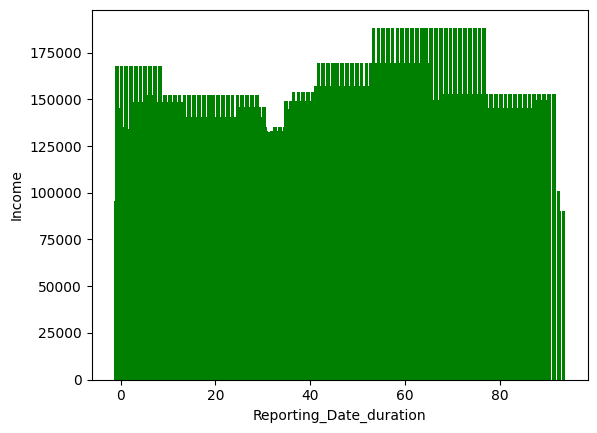

In [ ]:
plt.bar(x=df['Reporting_Date_duration'],height=df['Income'], color='green')
plt.xlabel('Reporting_Date_duration')
plt.ylabel('Income')
plt.show()

- According to above graph, the highest income holding by those people who has experiance between 60-80 months

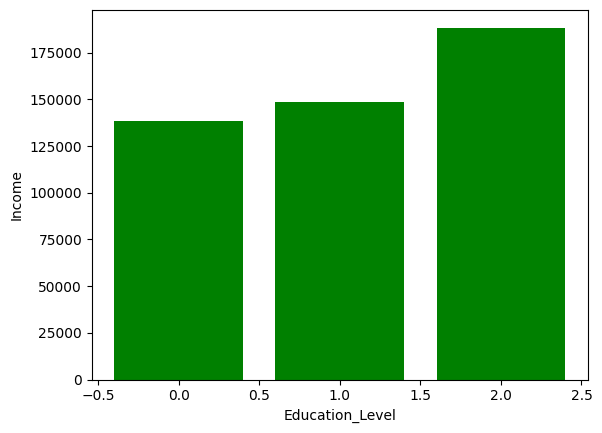

In [ ]:
plt.bar(x=df['Education_Level'],height=df['Income'], color='green')
plt.xlabel('Education_Level')
plt.ylabel('Income')
plt.show()

- Highest income holding by highest educated peoples

Finding Numerical columns

In [ ]:
num_cal=df.select_dtypes(include=['int64','float64']).columns
num_cal

Index(['Unnamed: 0', 'Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Is_Leaving', 'Reporting_Date_duration'],
      dtype='object')

Co-relation map which indicate relationship between two features

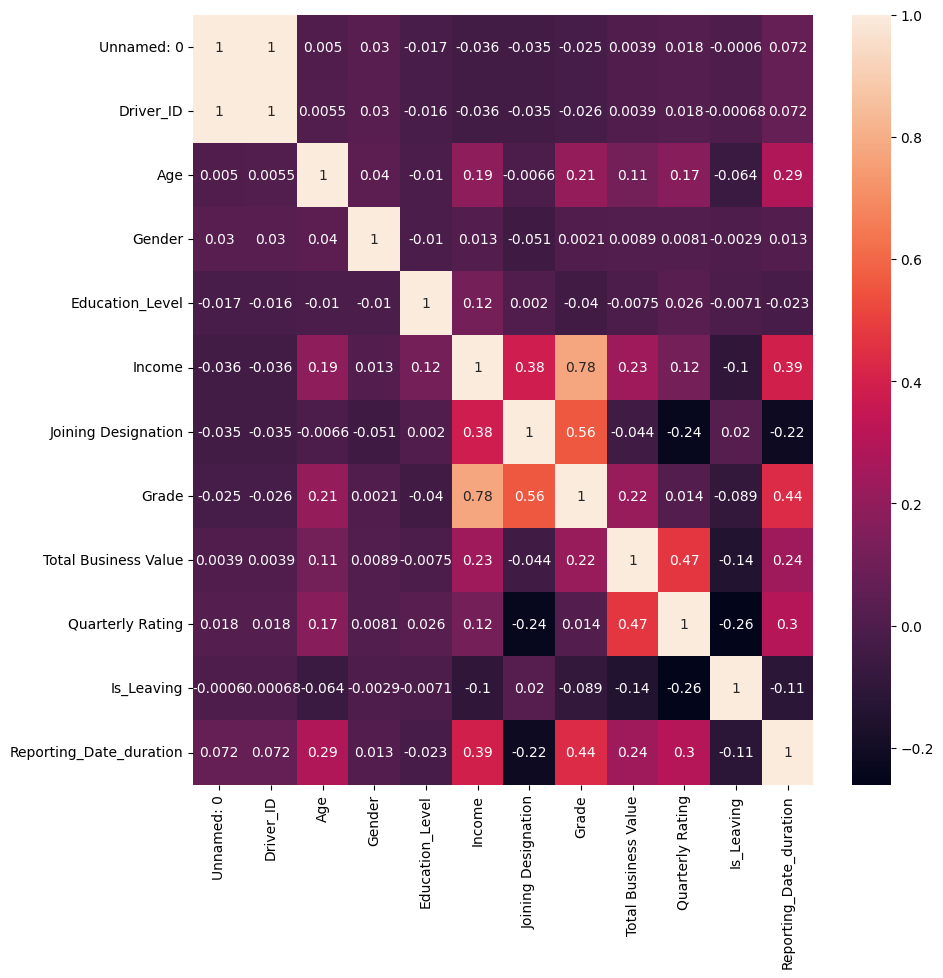

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num_cal].corr(),annot=True)
plt.show()

- Nearest to 1 indicate stronger relationship between two features
- Nearest to 0 is weak relationship.
- For e.g. Grade and Income has strong relationship

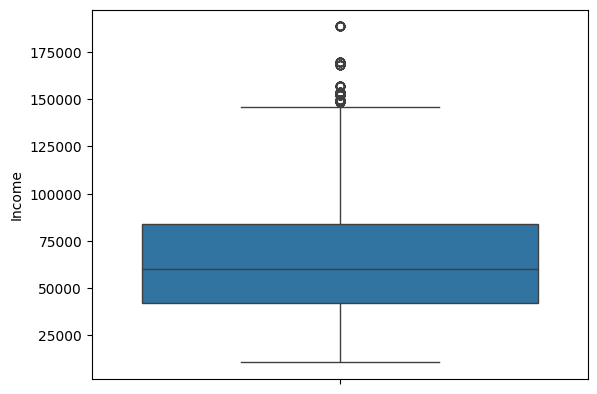

In [ ]:
sns.boxplot(df['Income'])
plt.show()

- There are outliers in the Income feature

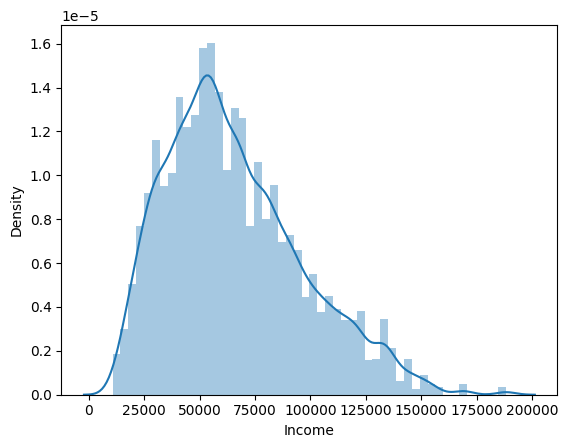

In [ ]:
sns.distplot(df['Income'])
plt.show()

- The income column data is not normaly distributed, it is looking as right skewed distribution.

**KNN Imputation :**
*Check for missing values and Prepare data for KNN Imputation*

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Driver_ID,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Joining Designation,0
Grade,0
Total Business Value,0


- We have two featured with null values, Age and Gender
- Let's fill it by using KNNImputer library which is famous for filling null values by wornderfull strategies.

In [ ]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df_imputed=pd.DataFrame(imputer.fit_transform(df[['Age','Gender']]),columns=['Age','Gender'])
df_imputed.head()

,Age,Gender
0,28.0,0.0
1,28.0,0.0
2,28.0,0.0
3,31.0,0.0
4,31.0,0.0


In [ ]:
df['Age']=df_imputed['Age']
df['Gender']=df_imputed['Gender']

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,0


**What percentage of drivers have received a quarterly rating of 4 ?**

In [ ]:
reting=df['Quarterly Rating'].value_counts()
print(round(reting/len(df)*100),2)


Quarterly Rating
1    40.0
2    29.0
3    20.0
4    10.0
Name: count, dtype: float64 2


- 10% drivers got 4 reting

----
**Comment on the correlation between Age and Quarterly Rating.**

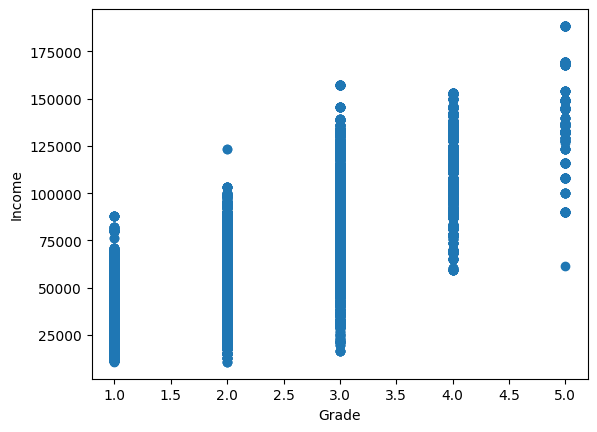

Correaltion: 0.7783833974539701


In [ ]:
plt.scatter(x=df['Grade'],y=df['Income'])
plt.xlabel('Grade')
plt.ylabel('Income')
plt.show()
print('Correaltion:',df['Grade'].corr(df['Income']))

-Grade and Income has a very strong co-relation, that means salary is increased when grade increased

**Checking whether the driver those are leaving how they are reporting as compare to those are not leaving**

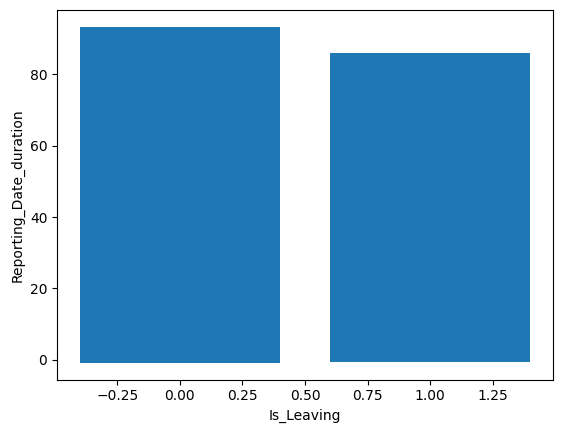

In [ ]:
plt.bar(height=df['Reporting_Date_duration'],x=df['Is_Leaving'])
plt.xlabel('Is_Leaving')
plt.ylabel('Reporting_Date_duration')
plt.show()

- As per the bove plot I am trying to understand that those drive who are leaving those reporting time is less than those who are not leaving.

**Name the city which showed the most improvement in Quarterly Rating over
the past year**

In [ ]:
df['Quarter']=df['MMM-YY'].dt.quarter
df['Year']=df['MMM-YY'].dt.year

In [ ]:
quaterly=df.groupby('City')['Quarter'].value_counts().reset_index()
quaterly.sort_values(by=['City','count'],ascending=False)
rating_2019=df.loc[(df['Year']==2019),('City','Quarterly Rating','Year')]
rating_2020=df.loc[(df['Year']==2020),('City','Quarterly Rating','Year')]

,City,Quarterly Rating,Year
3,C7,1,2020
4,C7,1,2020
6,C13,1,2020
7,C13,1,2020
8,C13,1,2020


In [ ]:
City_name=rating_2019.groupby('City')['Quarterly Rating'].mean().sort_values(ascending=False).reset_index()

City_name.head()

,City,Quarterly Rating
0,C29,2.261036
1,C24,2.236364
2,C26,2.142857
3,C16,2.100737
4,C8,2.097884


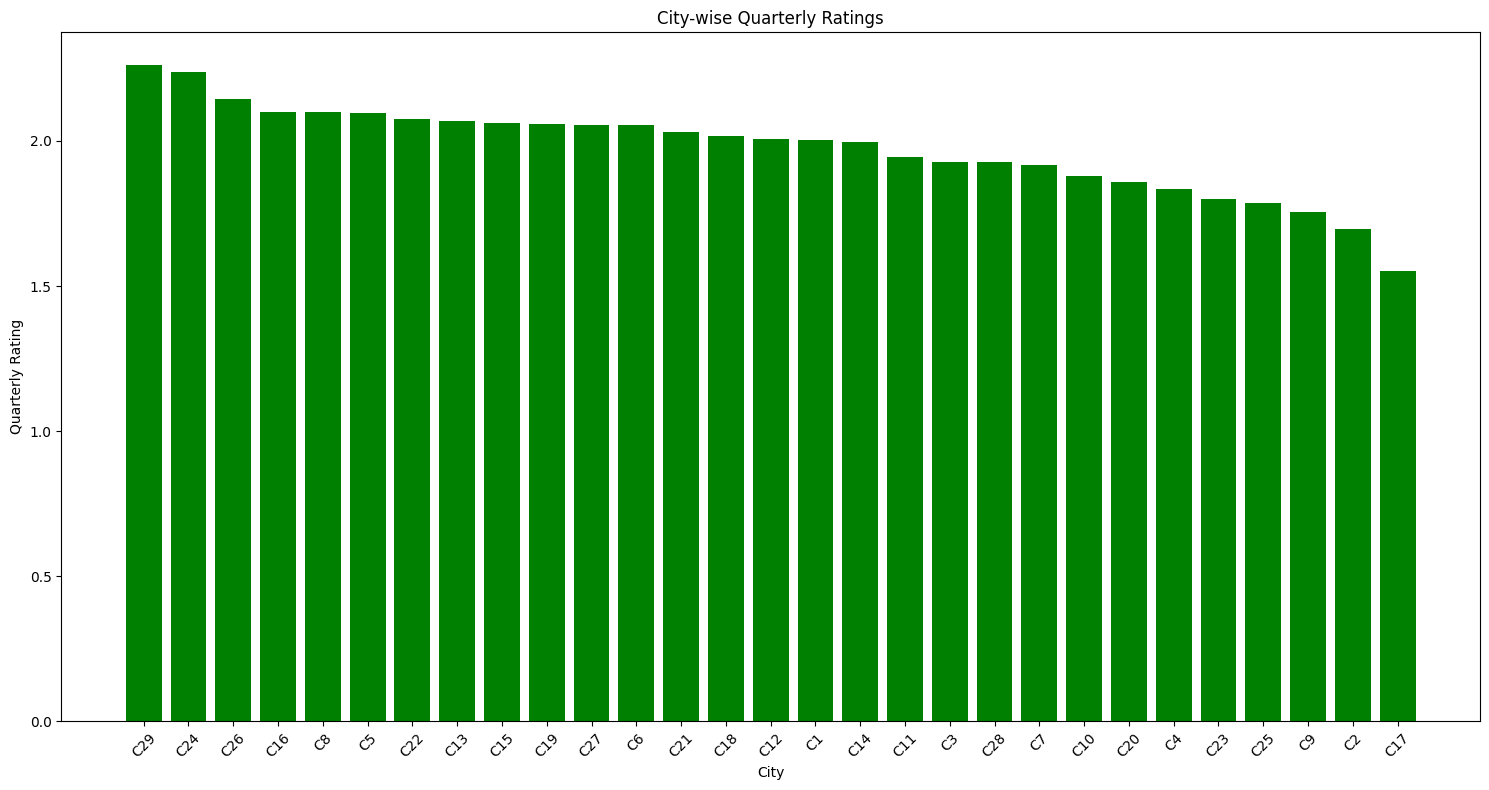

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))  # Ensure plt.figure is not overwritten

plt.bar(x=City_name['City'], height=City_name['Quarterly Rating'], color='green')
plt.xlabel('City')
plt.ylabel('Quarterly Rating')
plt.title('City-wise Quarterly Ratings')
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for readability
plt.tight_layout()
plt.show()


- The City C29 has the highest quterly rating average

**Class Imbalance treatment**
- Lets check imbalanced class in dataset

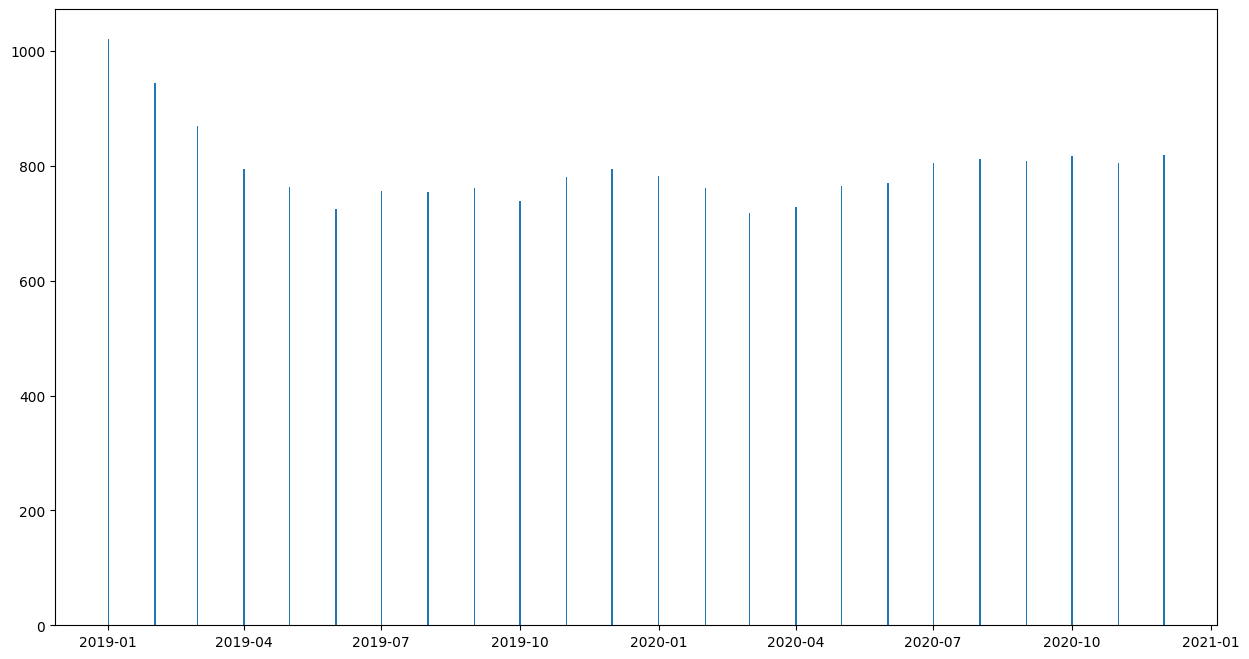

In [ ]:
report=df['MMM-YY'].value_counts().reset_index()
plt.figure(figsize=(15,8))
plt.bar(x=report['MMM-YY'],height=report['count'])
plt.show()

-As per the above plot we can see that the driver have reported the maximum time in Jan-2019.

-Converting df['LastWorkingDate'] column to datetime to fetch month and year

In [ ]:
lastdate=df['LastWorkingDate'].value_counts().sort_values().reset_index()
lastdate['LastWorkingDate']=lastdate['LastWorkingDate'].astype('datetime64[ns]')
lastdate['lastdate']=lastdate['LastWorkingDate'].astype('datetime64[ns]')
lastdate['lastWorkingDay']=lastdate['LastWorkingDate'].dt.day
lastdate['lastWorkingMonth']=lastdate['LastWorkingDate'].dt.month
lastdate['lastWorkingYear']=lastdate['LastWorkingDate'].dt.year

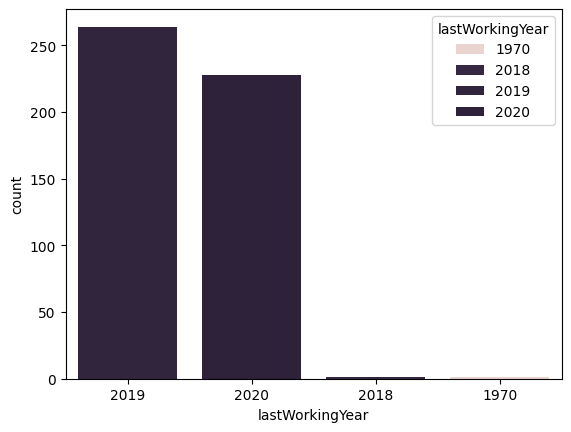

In [ ]:
sns.countplot(data=lastdate,x='lastWorkingYear',hue='lastWorkingYear',order=lastdate['lastWorkingYear'].value_counts().index)
plt.show()

- Highest number of drive leave the company in 2019
- It may be due to COVID19 period
- Next Year it get decreased the number of driver who left the OLA.

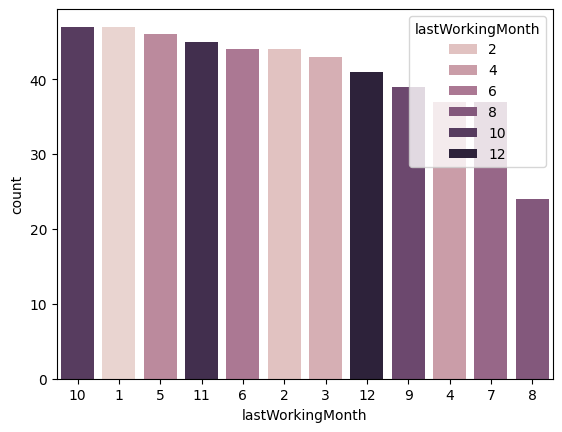

In [ ]:
sns.countplot(data=lastdate,x='lastWorkingMonth',hue='lastWorkingMonth',order=lastdate['lastWorkingMonth'].value_counts().index)
plt.show()

- Most number of OLA driver left the company mostly in Jan and Oct month, near about 50 employees left.
- Less number of Drivers have left the company in AUG month, around 25  Employees.

----

Count the total years of experiance of Drivers in OLA before letf the compnay.

- Converting column LastWorkingDate from Object to Datetime datatype.

In [ ]:
df['LastWorkingDate']=df['LastWorkingDate'].astype('datetime64[ns]')

In [ ]:
df['Total_Months_Worked_In_OLA']=(df['LastWorkingDate']-df['Dateofjoining'])
df['Total_Months_Worked_In_OLA']=df['Total_Months_Worked_In_OLA'].dt.days/30
df['Total_Months_Worked_In_OLA']=df['Total_Months_Worked_In_OLA'].apply(lambda x:0 if (x<0) else x)
df['Total_Months_Worked_In_OLA']=df['Total_Months_Worked_In_OLA'].astype('int')

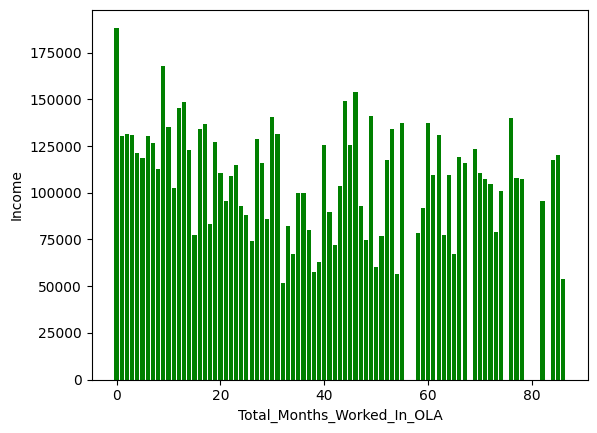

In [ ]:
plt.bar(x=df['Total_Months_Worked_In_OLA'],height=df['Income'], color='green')
plt.xlabel('Total_Months_Worked_In_OLA')
plt.ylabel('Income')
plt.show()

- According to the above plot the Drivers who left the OLA company within a month those are having highest number of income as compare to the other OLA drivers.
- `It mean who has the highest income as compare to other drivers those drivers can be left within a month of OLA join.`

In [ ]:
a=df.loc[df['Total_Months_Worked_In_OLA']>0,'Total_Months_Worked_In_OLA'].value_counts().reset_index()
a.head()

,Total_Months_Worked_In_OLA,count
0,2,176
1,4,174
2,3,174
3,5,127
4,1,115


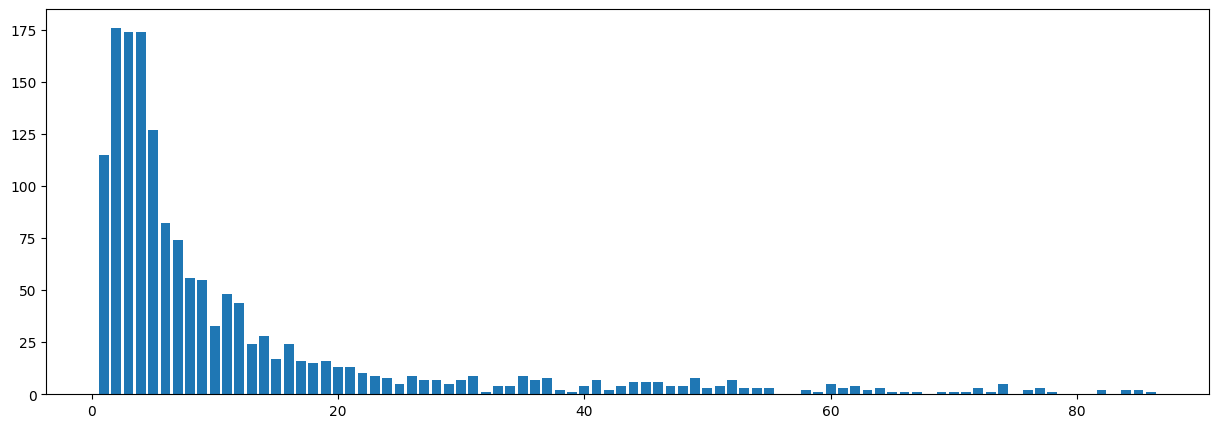

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(x=a['Total_Months_Worked_In_OLA'],height=a['count'])
plt.show()

- Most of the OLA driver left the companies withing 10 m0nths
- It means there is high chances of left the company within 10 months from join date.


**Encoding**
- Encoding the Categorical value into number.



In [ ]:
#df['City'].value_counts()

- Triying to encode by using LabelEncoder
- There are total 29 city

In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
encoder=LabelEncoder()
df['City_le']=encoder.fit_transform(df['City'])

- Trying to encode by using Ordinal Encoding

In [ ]:
oencoder=OrdinalEncoder()
df['City_oe']=oencoder.fit_transform(df[['City']])

- Trying to encode by using Target Encoding

In [ ]:
from sklearn.preprocessing import TargetEncoder
tencoder=TargetEncoder()
df['City_te']=tencoder.fit_transform(df[['City']],df[['Is_Leaving']])


In [ ]:
df['City_te'].value_counts()


,count
City_te,
0.102505,218
0.105628,213
0.115049,200
0.118462,198
0.053853,194
...,...
0.101570,87
0.115703,86
0.115873,84


- As we can see the above three encoding technique (Label,Ordinal and Target Encoding),
- We got the best encoding result from the target encoding.
- so we will keep the target encoding and delete the remaining columns.

In [ ]:
df['City']=df['City_te']
df.drop(columns=['City_le','City_oe','City_te','Year'],inplace=True)

In [ ]:
df.head(2)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Is_Leaving,Reporting_Date_duration,Quarter,Total_Months_Worked_In_OLA
0,0,2019-01-01,1,28.0,0.0,0.118097,2,57387,2018-12-24,1970-01-01,1,1,2381060,2,0,0.266667,1,0
1,1,2019-02-01,1,28.0,0.0,0.100644,2,57387,2018-12-24,1970-01-01,1,1,-665480,2,0,1.300000,1,0


In [ ]:
df['Reporting_Year']=df['MMM-YY'].dt.year
df['Reporting_Month']=df['MMM-YY'].dt.month
df['MonthOfjoining']=df['Dateofjoining'].dt.month
df['YearOfjoining']=df['Dateofjoining'].dt.year

- We are going to remove the LastWorkingDate colums as we already have created separate columns like, Is_Leaving,LastWorkingDay,LastWorkingMonth and LastWorkingYear for more analysis.


In [ ]:
df.drop(columns=['LastWorkingDate','MMM-YY','Dateofjoining'],inplace=True)

--------
--------

**Standardization :**

-  `We don't need to standardize features when using models like Naive Bayes, Decision Trees, Random Forest, XGBoost, or LightGBM because of the way these algorithms work internally.`



----
----

**Class Imbalance treatment :**

- Checking the number of positive and Negative classes

In [ ]:
meaning=pd.DataFrame({'Is_Leaving':[0,1],'Meaning':['Continue with the OLA Company','Left the OLA Company']})

df['Is_Leaving'].value_counts().reset_index().merge(meaning,on='Is_Leaving',how='inner')

,Is_Leaving,count,Meaning
0,0,17488,Continue with the OLA Company
1,1,1616,Left the OLA Company


- `Here we can see the class is not balanced(Imbalanced)`
- `Number of employee left is very less as compare to Number of continue to work with OLA.`

**First we will try to create model without changing the balanced class by using RandomForestClassifier**

- Importing essential library

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

- `Partition the data into Train and Test`

In [ ]:
X=df.drop(columns='Is_Leaving')
y=df['Is_Leaving']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

- `Test the Model `

In [ ]:
y_pred=rf.predict(X_test)

- `Check the accuracy of model`

In [ ]:
rf1_acc_score=accuracy_score(y_test,y_pred)
rf1_acc_score

0.9971211724679403

- `Check the Confusion Matrix`

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[3490    0]
 [  11  320]]


In [ ]:
(3490+320)/(3490+320+11+0)

0.9971211724679403

- `We will check classification report`

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3490
           1       1.00      0.97      0.98       331

    accuracy                           1.00      3821
   macro avg       1.00      0.98      0.99      3821
weighted avg       1.00      1.00      1.00      3821



- `It is means the data is highly imbalanced`

**`Les't Visually check the Precision-Recall Curve or ROC`**

[0.98 0.   0.01 ... 0.98 0.95 0.91]


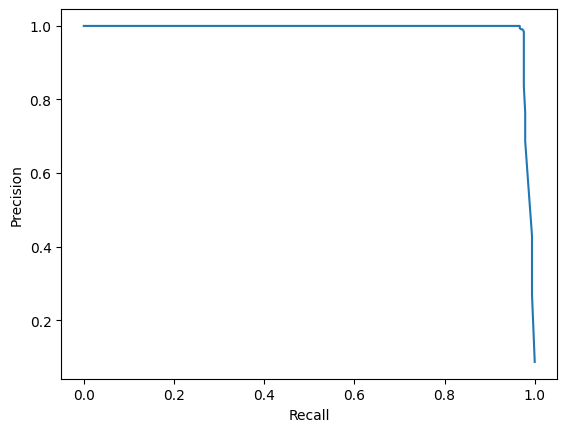

In [ ]:
from sklearn.metrics import precision_recall_curve,roc_curve,auc
import matplotlib.pyplot as plt
y_scores=rf.predict_proba(X_test)[:,1]
print(y_scores)
precision,recall,thresholds=precision_recall_curve(y_test,y_scores)
fpr,tpr,thresholds=roc_curve(y_test,y_scores)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


- `High precision can happen with very few positive predictions`


----


**`Let's Try to balance the classes with the help of SMOTE`**

**`SMOTE :Systematic Minority Over-Sampling Technique`**

- `We have less amount of positive classes, so we are using SMOTE to balance the class data.`

- Before Balancing the sample class

In [ ]:
df['Is_Leaving'].value_counts()

,count
Is_Leaving,
0,17488
1,1616


In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_smote,y_smote=smote.fit_resample(X,y)

In [ ]:
print('After Balacing the class data')
y_smote.value_counts()

After Balacing the class data


,count
Is_Leaving,
0,17488
1,17488


**`Let's try to train the model after balacing the class by using Bagging and Boosint algorithm`**

**`Bagging: RandomForestClassifier Algorithm`**

In [ ]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_smote,y_smote,test_size=0.2,random_state=42)
rf2=RandomForestClassifier(n_estimators=100)

rf2.fit(X_train_smote,y_train_smote)

RandomForestClassifier()

In [ ]:
y_pred_smote=rf2.predict(X_test_smote)
rf2_acc_score=accuracy_score(y_pred_smote,y_test_smote)
rf2_acc_score

0.9965694682675815

In [ ]:
print(confusion_matrix(y_test_smote,y_pred_smote))

[[3523    0]
 [  24 3449]]


In [ ]:
print(classification_report(y_test_smote,y_pred_smote))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3523
           1       1.00      0.99      1.00      3473

    accuracy                           1.00      6996
   macro avg       1.00      1.00      1.00      6996
weighted avg       1.00      1.00      1.00      6996



- `Precision: 99% are actual positive  out of all predicted positives. `
- `Recall   : 99% values are currectly predicted as positive from out of all actual positive.`

**`Boosting Technique:`**
- `Let's with below booting techniques`
- `GradientBoostingClassifier`


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
params={
    'max_depth': [2, 3, 4, 5, 6],
    'n_estimators': [100],
    'learning_rate': [0.1]
        }
xgb_grid=GridSearchCV(XGBClassifier(),param_grid=params,cv=3,scoring='accuracy')

xgb_grid.fit(X_train_smote,y_train_smote)
xgb_acc_score=xgb_grid.best_score_
print("Best Parameters    : ",xgb_grid.best_params_)
print("Best Acciracy Score: ",xgb_acc_score)

Best Parameters    :  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Best Acciracy Score:  0.9959256573440128


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
bg=GradientBoostingClassifier(n_estimators=100,learning_rate=0.2,max_depth=3)
bg.fit(X_train_smote,y_train_smote)

GradientBoostingClassifier(learning_rate=0.2)

In [ ]:
y_pred_bg=bg.predict(X_test_smote)
bg_acc_score=accuracy_score(y_pred_bg,y_test_smote)
bg_acc_score

0.9947112635791882

-`Lets try with max_depth from 1-10 by using for loop `

In [ ]:
for i in range(1,10):
  bg=GradientBoostingClassifier(n_estimators=100,learning_rate=0.2,max_depth=i)
  bg.fit(X_train_smote,y_train_smote)
  y_pred_bg=bg.predict(X_test_smote)
  accuracy_score(y_pred_bg,y_test_smote)
  print(i,accuracy_score(y_pred_bg,y_test_smote))

1 0.9907089765580331
2 0.9929959977129789
3 0.9947112635791882
4 0.9951400800457404
5 0.9952830188679245
6 0.9954259576901087
7 0.9962835906232133
8 0.9962835906232133
9 0.9964265294453973


- we go the 99% accuracy after balanced class also.

----

**`Confusion Matrix and Classification Report after SMOTE`**

- `Lets check teh classification report and Confision matrix to understand the performance of the model.`

In [ ]:
print('*'*20,' Confusion Matrix ','*'*20)
print(confusion_matrix(y_test_smote,y_pred_smote))
print('*'*18,' Classification Report','*'*18)
print(classification_report(y_test_smote,y_pred_smote))

********************  Confusion Matrix  ********************
[[3523    0]
 [  24 3449]]
******************  Classification Report ******************
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3523
           1       1.00      0.99      1.00      3473

    accuracy                           1.00      6996
   macro avg       1.00      1.00      1.00      6996
weighted avg       1.00      1.00      1.00      6996



- `True Positive: 3523 predicted which are actual positive and also predicted currectly as positive`
- `True Negative: 3449 predicted which are actual Nigative  and also currectly predicted as Negative`
-  `False Negative: 24 are predicted as Negative but which are actully positive`

- `Precision: 99% are actual positive  out of all predicted positives. `
- `Recall   : 99% values are currectly predicted as positive from out of all actual positive.`

-----

In [ ]:
print("***************With Imbalanced classes *********************")
print()
print("RandomForestClassifier Accuracy Score :",rf1_acc_score)
print()
print("**************With Balanced SMOTE classes *******************")
print()
print("RandomForestClassifier Accuracy Score     :",rf2_acc_score)
print("GradientBoostingClassifier Accuracy Score :",bg_acc_score)
print("XGBClassifier Accuracy Score              :",xgb_acc_score)


***************With Imbalanced classes *********************

RandomForestClassifier Accuracy Score : 0.9971211724679403

**************With Balanced SMOTE classes *******************

RandomForestClassifier Accuracy Score     : 0.9965694682675815
GradientBoostingClassifier Accuracy Score : 0.9958547741566609
XGBClassifier Accuracy Score              : 0.9959256573440128


**`Insightes:`**
- `As per the data analysis we found that the OLA Taxi Driver mostly left the OLA company within 10-15 months.`
- `Once any OLA driver crossed the 10-15 months of experiance in OLA company, that person having the less chance to left the Company.`
- `Most of driver leaving company within 10-15 months, may be they are able to adjust in OLA company culture.`
- `May be they are not getting proper training from OLA Company.`
- `Most of the Driver left teh company in the years of 2019 amd 2020.`
- `There might be reason to left the company due to COVID situation.`

**`Recommendations`:**
- `Need to provide good training to newly hired OLA Driver.`
- `Try to hire the perople who has the less income.`